# Regression

In [1]:
import pandas as pd
import numpy as np
from zwml.datasets import make_regression
from zwml.linear_models import linear_regression

In [6]:
mr = make_regression()
X,y = mr.build_dataset()

In [7]:
lr = linear_regression()

In [8]:
lr.fit(X, y)

In [9]:
lr.score(X, y)

-1.1401831554579134

In [10]:
preds = lr.predict(X)

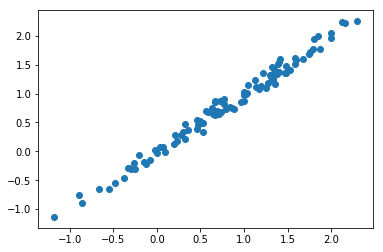

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(lr.predict(X),y);

In [12]:
new_X = mr.muck_up_data(X, add_nan=False)

In [13]:
from zwml.linear_models import sgd_regressor
sgd = sgd_regressor(regularize=None)

In [14]:
sgd.fit(new_X, y)

In [15]:
sgd.score(new_X,y)

-0.0084843458557672252

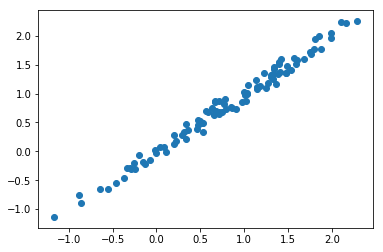

In [16]:
plt.scatter(sgd.predict(new_X),y);

# KDE

In [17]:
from zwml.neighbors import kde_approximator
import numpy as np

X = np.hstack((np.random.normal(0,0.5,100), np.random.normal(5,1,100), np.random.normal(-5,2,50)))
X.shape

(250,)

In [22]:
kde = kde_approximator(bandwidth=1, grid_fineness=60)
kde.fit(X)
kde.make_surface()

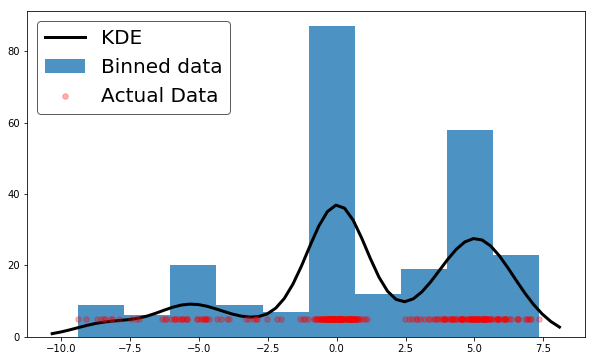

In [23]:
plt.figure(figsize=(10,6))

plt.hist(X, label="Binned data", alpha=0.8, zorder=1)
plt.plot(kde.region, kde.probs, c='k', lw=3, label="KDE", zorder=2);
plt.scatter(X, [5]*len(X), marker='o', c='r', s=30, alpha=0.3,label='Actual Data', zorder=3)
plt.legend(fontsize=20, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333');

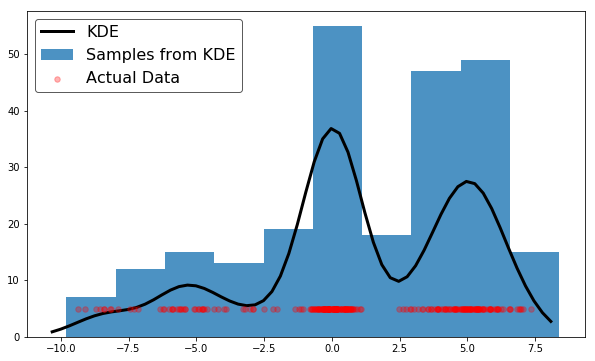

In [25]:
samp = kde.sample(num_samples=250, random_state=42)
plt.figure(figsize=(10,6))
plt.hist(samp, label="Samples from KDE", alpha=0.8, zorder=1)
plt.plot(kde.region, kde.probs, c='k', lw=3, label="KDE", zorder=2);
plt.scatter(X, [5]*len(X), marker='o', c='r', s=30, alpha=0.3,label='Actual Data', zorder=3)
plt.legend(fontsize=16, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333');

# Clustering

In [40]:
import numpy as np
from zwml.clustering import dbscan


np.random.seed(24)
def get_data(n_clust = 3, n_points=50):
    X1 = np.random.normal(0,.3,n_points).reshape(-1,1)
    y1 = np.random.normal(0,.3,n_points).reshape(-1,1)
    for _ in range(n_clust-1):
        X2 = np.random.normal(np.random.randint(0,10),.3,n_points).reshape(-1,1)
        y2 = np.random.normal(np.random.randint(0,10),.3,n_points).reshape(-1,1)
        X1 = np.vstack((X1,X2)).reshape(-1,1)
        y1 = np.vstack((y1,y2)).reshape(-1,1)
    X = np.hstack((X1,y1))
    return X

X = get_data(n_clust = 5, n_points=100)

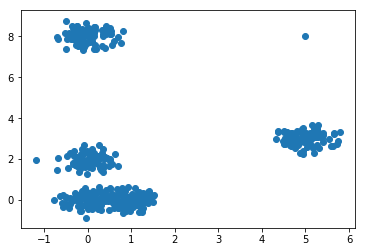

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

X = np.append(X,[[5,8]], axis=0)
plt.scatter(X[:,0], X[:,1])

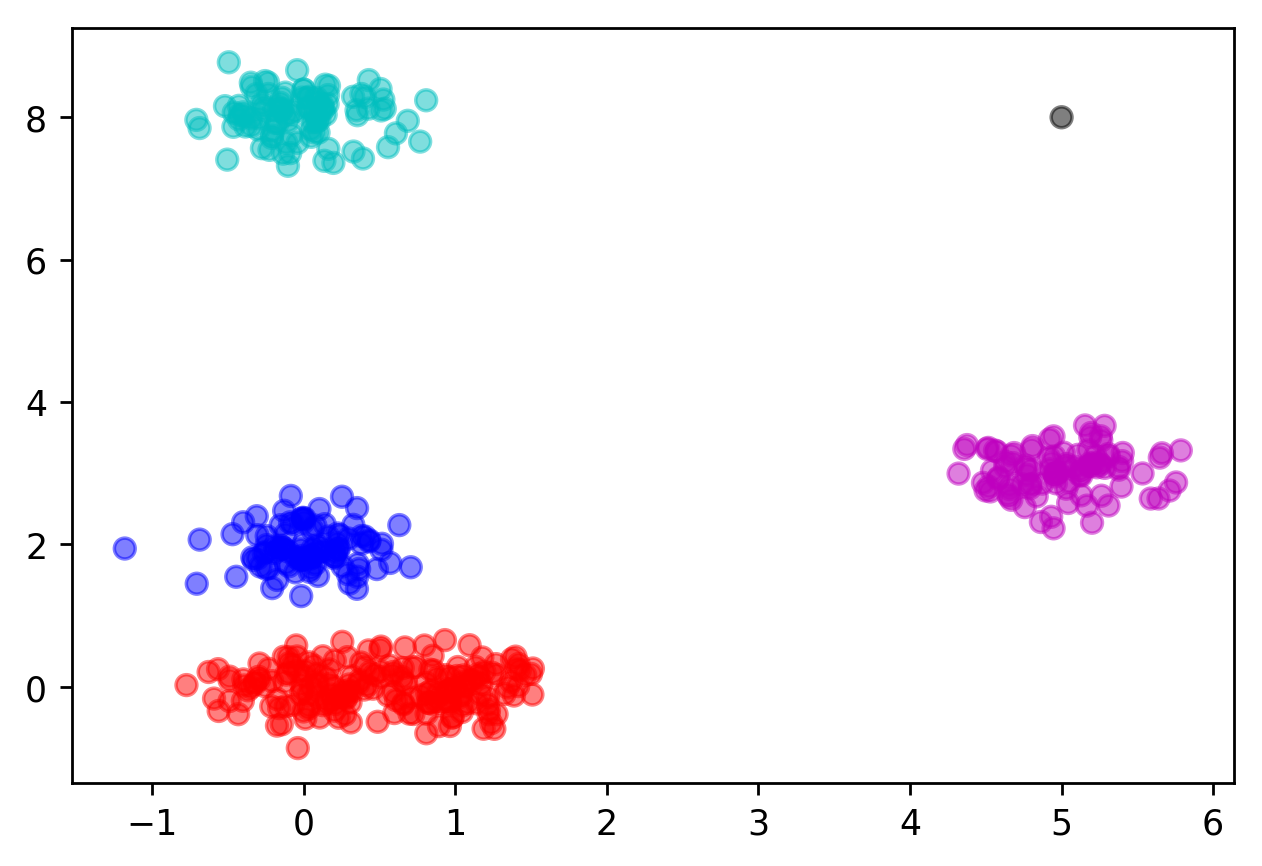

In [42]:
db = dbscan(epsilon=0.6, min_points=5)
db.fit(X)

color_possibilities = 'rbcmyg'
colors = []
for i in db.labels_:
    # For Noise points!
    if i == -1:
        colors.append('k')
    else:
        colors.append(color_possibilities[i%len(color_possibilities)])
        
plt.figure(dpi=250)
plt.scatter(X[:,0],X[:,1], c=colors, alpha=0.5);

# Classification

In [1]:
from zwml.tree_models import random_forest_classifier
from zwml.datasets import load_iris

X, y = load_iris()

In [2]:
rf = random_forest_classifier()
rf.fit(X,y)
pred = rf.predict(X)

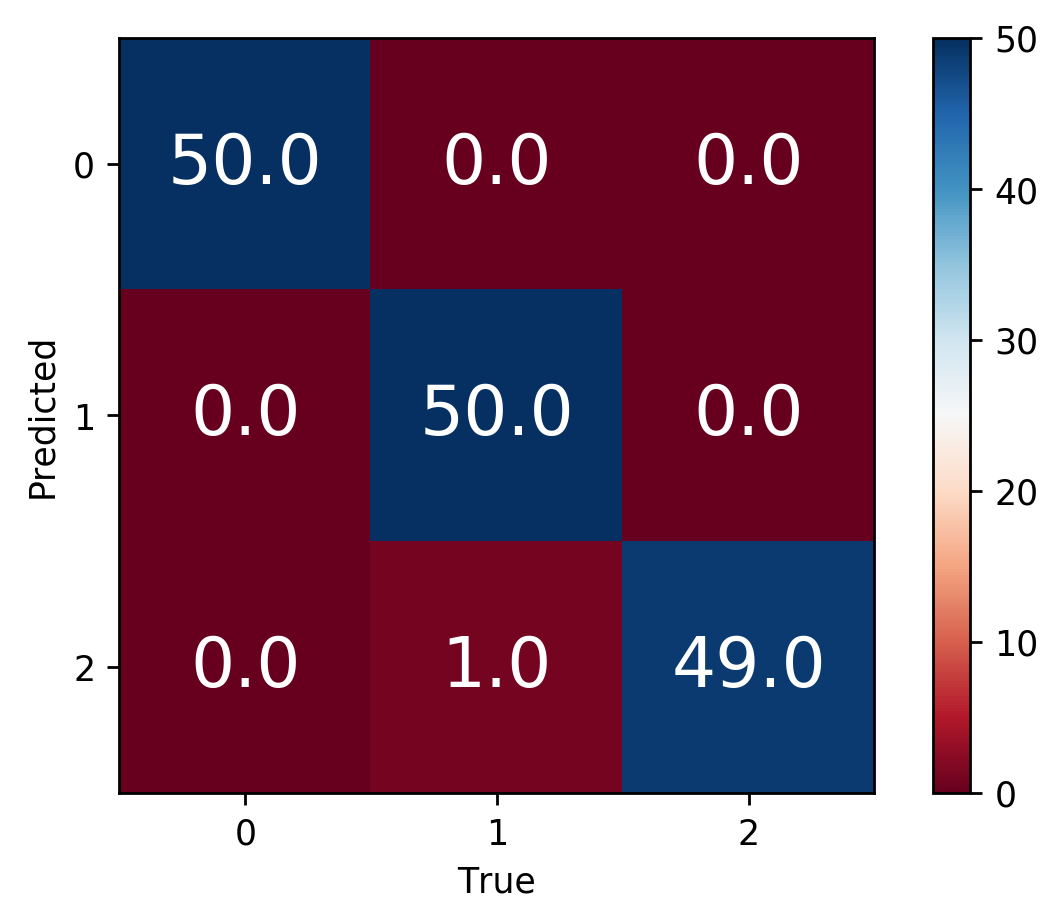

array([[ 50.,   0.,   0.],
       [  0.,  50.,   0.],
       [  0.,   1.,  49.]])

In [6]:
from zwml.metrics import pretty_confusion_matrix, classification_report

pretty_confusion_matrix(y, pred, show_text=True)

In [4]:
classification_report(y,pred)

--- Label 0 ---
Precision: 1.000
Recall: 1.000
F1: 1.000

--- Label 1 ---
Precision: 0.980
Recall: 1.000
F1: 0.990

--- Label 2 ---
Precision: 1.000
Recall: 0.980
F1: 0.990

--- Average ---
Precision: 0.993
Recall: 0.993
F1: 0.993
Accuracy: 0.993


# Distance Metrics

Let's find the 5 closest points to a new_point

In [13]:
from zwml.metrics import euclidean_distance

data = np.random.uniform(0,10,size=(20,2))
new_point = np.random.uniform(0,1, size=(1,2))
distance = np.zeros(20)
for idx, pt in enumerate(data):
    distance[idx] = euclidean_distance(pt, new_point)
points_with_distance = np.hstack((data, distance.reshape(-1,1)))
sorted_points_by_distance = np.array(sorted(points_with_distance, key=lambda x: x[2]))
sorted_points_by_distance[:5,:2]

array([[ 0.92484689,  1.41469338],
       [ 0.19383649,  2.9138271 ],
       [ 4.76088191,  2.77186905],
       [ 4.33139631,  3.65616636],
       [ 4.2162711 ,  4.89566043]])